# Pandas的时间序列处理 

## 创建

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

# 指定index为datetime的list
date_list = [datetime(2018, 3, 3), datetime(2018, 3, 4), 
             datetime(2018, 3, 10), datetime(2018, 3, 11), 
             datetime(2018, 3, 17), datetime(2018, 3, 18)]
time_s = pd.Series(np.random.randn(6), index=date_list)
print(time_s)
print(type(time_s.index))

2018-03-03   -1.479218
2018-03-04    0.411919
2018-03-10    0.765279
2018-03-11    1.157496
2018-03-17    0.696901
2018-03-18   -0.396603
dtype: float64
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [2]:
# pd.date_range()
dates = pd.date_range('2018-05-23', # 起始日期
                      periods=7,    # 周期
                      freq='W-MON') # 频率
print(dates)
print(pd.Series(np.random.randn(7), index=dates))

DatetimeIndex(['2018-05-28', '2018-06-04', '2018-06-11', '2018-06-18',
               '2018-06-25', '2018-07-02', '2018-07-09'],
              dtype='datetime64[ns]', freq='W-MON')
2018-05-28   -0.808014
2018-06-04   -0.415286
2018-06-11    1.286651
2018-06-18   -0.696134
2018-06-25   -0.670231
2018-07-02    1.211439
2018-07-09   -0.991688
Freq: W-MON, dtype: float64


## 索引

In [3]:
# 索引位置
print(time_s[0])

-1.4792177021463906


In [4]:
# 索引值
print(time_s[datetime(2018, 3, 3)])

-1.4792177021463906


In [5]:
# 可以被解析的日期字符串
print(time_s['20180303'])

-1.4792177021463906


In [6]:
# 按“年份”、“月份”索引
print(time_s['2018-3'])

2018-03-03   -1.479218
2018-03-04    0.411919
2018-03-10    0.765279
2018-03-11    1.157496
2018-03-17    0.696901
2018-03-18   -0.396603
dtype: float64


In [7]:
# 切片操作
print(time_s['2018-3-6':])

2018-03-10    0.765279
2018-03-11    1.157496
2018-03-17    0.696901
2018-03-18   -0.396603
dtype: float64


## 过滤


In [8]:
print(time_s)

2018-03-03   -1.479218
2018-03-04    0.411919
2018-03-10    0.765279
2018-03-11    1.157496
2018-03-17    0.696901
2018-03-18   -0.396603
dtype: float64


In [9]:
tims_s2 = time_s.truncate(before='2018-3-15')
tims_s2

2018-03-17    0.696901
2018-03-18   -0.396603
dtype: float64

In [10]:
time_s.truncate(after='2018-3-15')

2018-03-03   -1.479218
2018-03-04    0.411919
2018-03-10    0.765279
2018-03-11    1.157496
dtype: float64

## 生成日期范围

In [11]:
# 传入开始、结束日期，默认生成的该时间段的时间点是按天计算的
date_index = pd.date_range('2018/03/03', '2018/03/31')
print(date_index)

DatetimeIndex(['2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06',
               '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10',
               '2018-03-11', '2018-03-12', '2018-03-13', '2018-03-14',
               '2018-03-15', '2018-03-16', '2018-03-17', '2018-03-18',
               '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22',
               '2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-03-31'],
              dtype='datetime64[ns]', freq='D')


In [12]:
# 只传入开始或结束日期，还需要传入时间段
print(pd.date_range(start='2018/03/03', periods=10, freq='4D'))

DatetimeIndex(['2018-03-03', '2018-03-07', '2018-03-11', '2018-03-15',
               '2018-03-19', '2018-03-23', '2018-03-27', '2018-03-31',
               '2018-04-04', '2018-04-08'],
              dtype='datetime64[ns]', freq='4D')


In [13]:
print(pd.date_range(end='2018/03/31', periods=10))

DatetimeIndex(['2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', freq='D')


In [14]:
# 规范化时间戳 
print(pd.date_range(start='2018/08/03 12:13:14', periods=10))
print(pd.date_range(start='2018/08/03 12:13:14', periods=10, normalize=True))

DatetimeIndex(['2018-08-03 12:13:14', '2018-08-04 12:13:14',
               '2018-08-05 12:13:14', '2018-08-06 12:13:14',
               '2018-08-07 12:13:14', '2018-08-08 12:13:14',
               '2018-08-09 12:13:14', '2018-08-10 12:13:14',
               '2018-08-11 12:13:14', '2018-08-12 12:13:14'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-11', '2018-08-12'],
              dtype='datetime64[ns]', freq='D')


## 频率与偏移量

In [15]:
print(pd.date_range('2018/03/03', '2018/03/31', freq='2D'))

DatetimeIndex(['2018-03-03', '2018-03-05', '2018-03-07', '2018-03-09',
               '2018-03-11', '2018-03-13', '2018-03-15', '2018-03-17',
               '2018-03-19', '2018-03-21', '2018-03-23', '2018-03-25',
               '2018-03-27', '2018-03-29', '2018-03-31'],
              dtype='datetime64[ns]', freq='2D')


In [16]:
# 偏移量通过加法连接
sum_offset = pd.tseries.offsets.Week(2) + pd.tseries.offsets.Hour(12)
print(sum_offset)

print(pd.date_range('2018/03/03', '2018/04/30', freq=sum_offset))

14 days 12:00:00
DatetimeIndex(['2018-03-03 00:00:00', '2018-03-17 12:00:00',
               '2018-04-01 00:00:00', '2018-04-15 12:00:00',
               '2018-04-30 00:00:00'],
              dtype='datetime64[ns]', freq='348H')


## 移动数据

In [17]:
ts = pd.Series(np.random.randn(5), index=pd.date_range('20180303', periods=5, freq='W-SAT'))
print(ts)

2018-03-03   -0.395482
2018-03-10   -1.465365
2018-03-17    2.498886
2018-03-24   -0.726293
2018-03-31    0.574964
Freq: W-SAT, dtype: float64


In [18]:
# print(ts.shift(1))
print(ts.shift(-1))

2018-03-03   -1.465365
2018-03-10    2.498886
2018-03-17   -0.726293
2018-03-24    0.574964
2018-03-31         NaN
Freq: W-SAT, dtype: float64


# 时间数据重采样

## resample

In [19]:
import pandas as pd
import numpy as np

date_rng = pd.date_range('20180303', periods=100, freq='D')
ser_obj = pd.Series(range(len(date_rng)), index=date_rng)
print(ser_obj.head(10))

2018-03-03    0
2018-03-04    1
2018-03-05    2
2018-03-06    3
2018-03-07    4
2018-03-08    5
2018-03-09    6
2018-03-10    7
2018-03-11    8
2018-03-12    9
Freq: D, dtype: int64


In [20]:
# 统计每个月的数据总和
resample_month_sum = ser_obj.resample('M').sum()
# 统计每个月的数据平均
resample_month_mean = ser_obj.resample('M').mean()

print('按月求和：')
print(resample_month_sum)

print('按月求均值：') 
print(resample_month_mean)

按月求和：
2018-03-31     406
2018-04-30    1305
2018-05-31    2294
2018-06-30     945
Freq: M, dtype: int64
按月求均值：
2018-03-31    14.0
2018-04-30    43.5
2018-05-31    74.0
2018-06-30    94.5
Freq: M, dtype: float64


## 降采样

In [21]:
# 将数据聚合到5天的频率
five_day_sum_sample = ser_obj.resample('5D').sum()
five_day_mean_sample = ser_obj.resample('5D').mean()
five_day_ohlc_sample = ser_obj.resample('5D').ohlc()

print('降采样，sum')
print(five_day_sum_sample)

降采样，sum
2018-03-03     10
2018-03-08     35
2018-03-13     60
2018-03-18     85
2018-03-23    110
2018-03-28    135
2018-04-02    160
2018-04-07    185
2018-04-12    210
2018-04-17    235
2018-04-22    260
2018-04-27    285
2018-05-02    310
2018-05-07    335
2018-05-12    360
2018-05-17    385
2018-05-22    410
2018-05-27    435
2018-06-01    460
2018-06-06    485
dtype: int64


In [22]:
print('降采样，mean')
print(five_day_mean_sample)

降采样，mean
2018-03-03     2
2018-03-08     7
2018-03-13    12
2018-03-18    17
2018-03-23    22
2018-03-28    27
2018-04-02    32
2018-04-07    37
2018-04-12    42
2018-04-17    47
2018-04-22    52
2018-04-27    57
2018-05-02    62
2018-05-07    67
2018-05-12    72
2018-05-17    77
2018-05-22    82
2018-05-27    87
2018-06-01    92
2018-06-06    97
dtype: int64


In [23]:
print('降采样，ohlc')
print(five_day_ohlc_sample)

降采样，ohlc
            open  high  low  close
2018-03-03     0     4    0      4
2018-03-08     5     9    5      9
2018-03-13    10    14   10     14
2018-03-18    15    19   15     19
2018-03-23    20    24   20     24
2018-03-28    25    29   25     29
2018-04-02    30    34   30     34
2018-04-07    35    39   35     39
2018-04-12    40    44   40     44
2018-04-17    45    49   45     49
2018-04-22    50    54   50     54
2018-04-27    55    59   55     59
2018-05-02    60    64   60     64
2018-05-07    65    69   65     69
2018-05-12    70    74   70     74
2018-05-17    75    79   75     79
2018-05-22    80    84   80     84
2018-05-27    85    89   85     89
2018-06-01    90    94   90     94
2018-06-06    95    99   95     99


In [24]:
# 使用groupby降采样
print(ser_obj.groupby(lambda x: x.month).sum())

3     406
4    1305
5    2294
6     945
dtype: int64


In [25]:
print(ser_obj.groupby(lambda x: x.weekday).sum())

0    665
1    679
2    693
3    707
4    721
5    735
6    750
dtype: int64


## 升采样

In [26]:
df = pd.DataFrame(np.random.randn(5, 3),
                 index=pd.date_range('20180101', periods=5, freq='W-MON'),
                 columns=['S1', 'S2', 'S3'])
print(df)

                  S1        S2        S3
2018-01-01  0.422765  0.113958 -0.067549
2018-01-08  0.203622 -0.017415  0.594671
2018-01-15  1.251393 -0.108620 -0.465289
2018-01-22 -0.190729 -1.364710  1.700750
2018-01-29  0.254331  0.255666  0.210320


In [27]:
# 直接重采样会产生空值
print(df.resample('D').asfreq())

                  S1        S2        S3
2018-01-01  0.422765  0.113958 -0.067549
2018-01-02       NaN       NaN       NaN
2018-01-03       NaN       NaN       NaN
2018-01-04       NaN       NaN       NaN
2018-01-05       NaN       NaN       NaN
2018-01-06       NaN       NaN       NaN
2018-01-07       NaN       NaN       NaN
2018-01-08  0.203622 -0.017415  0.594671
2018-01-09       NaN       NaN       NaN
2018-01-10       NaN       NaN       NaN
2018-01-11       NaN       NaN       NaN
2018-01-12       NaN       NaN       NaN
2018-01-13       NaN       NaN       NaN
2018-01-14       NaN       NaN       NaN
2018-01-15  1.251393 -0.108620 -0.465289
2018-01-16       NaN       NaN       NaN
2018-01-17       NaN       NaN       NaN
2018-01-18       NaN       NaN       NaN
2018-01-19       NaN       NaN       NaN
2018-01-20       NaN       NaN       NaN
2018-01-21       NaN       NaN       NaN
2018-01-22 -0.190729 -1.364710  1.700750
2018-01-23       NaN       NaN       NaN
2018-01-24      

In [28]:
#ffill
print(df.resample('D').ffill(2))

                  S1        S2        S3
2018-01-01  0.422765  0.113958 -0.067549
2018-01-02  0.422765  0.113958 -0.067549
2018-01-03  0.422765  0.113958 -0.067549
2018-01-04       NaN       NaN       NaN
2018-01-05       NaN       NaN       NaN
2018-01-06       NaN       NaN       NaN
2018-01-07       NaN       NaN       NaN
2018-01-08  0.203622 -0.017415  0.594671
2018-01-09  0.203622 -0.017415  0.594671
2018-01-10  0.203622 -0.017415  0.594671
2018-01-11       NaN       NaN       NaN
2018-01-12       NaN       NaN       NaN
2018-01-13       NaN       NaN       NaN
2018-01-14       NaN       NaN       NaN
2018-01-15  1.251393 -0.108620 -0.465289
2018-01-16  1.251393 -0.108620 -0.465289
2018-01-17  1.251393 -0.108620 -0.465289
2018-01-18       NaN       NaN       NaN
2018-01-19       NaN       NaN       NaN
2018-01-20       NaN       NaN       NaN
2018-01-21       NaN       NaN       NaN
2018-01-22 -0.190729 -1.364710  1.700750
2018-01-23 -0.190729 -1.364710  1.700750
2018-01-24 -0.19

In [29]:
print(df.resample('D').bfill())

                  S1        S2        S3
2018-01-01  0.422765  0.113958 -0.067549
2018-01-02  0.203622 -0.017415  0.594671
2018-01-03  0.203622 -0.017415  0.594671
2018-01-04  0.203622 -0.017415  0.594671
2018-01-05  0.203622 -0.017415  0.594671
2018-01-06  0.203622 -0.017415  0.594671
2018-01-07  0.203622 -0.017415  0.594671
2018-01-08  0.203622 -0.017415  0.594671
2018-01-09  1.251393 -0.108620 -0.465289
2018-01-10  1.251393 -0.108620 -0.465289
2018-01-11  1.251393 -0.108620 -0.465289
2018-01-12  1.251393 -0.108620 -0.465289
2018-01-13  1.251393 -0.108620 -0.465289
2018-01-14  1.251393 -0.108620 -0.465289
2018-01-15  1.251393 -0.108620 -0.465289
2018-01-16 -0.190729 -1.364710  1.700750
2018-01-17 -0.190729 -1.364710  1.700750
2018-01-18 -0.190729 -1.364710  1.700750
2018-01-19 -0.190729 -1.364710  1.700750
2018-01-20 -0.190729 -1.364710  1.700750
2018-01-21 -0.190729 -1.364710  1.700750
2018-01-22 -0.190729 -1.364710  1.700750
2018-01-23  0.254331  0.255666  0.210320
2018-01-24  0.25

In [30]:
print(df.resample('D').fillna('ffill'))

                  S1        S2        S3
2018-01-01  0.422765  0.113958 -0.067549
2018-01-02  0.422765  0.113958 -0.067549
2018-01-03  0.422765  0.113958 -0.067549
2018-01-04  0.422765  0.113958 -0.067549
2018-01-05  0.422765  0.113958 -0.067549
2018-01-06  0.422765  0.113958 -0.067549
2018-01-07  0.422765  0.113958 -0.067549
2018-01-08  0.203622 -0.017415  0.594671
2018-01-09  0.203622 -0.017415  0.594671
2018-01-10  0.203622 -0.017415  0.594671
2018-01-11  0.203622 -0.017415  0.594671
2018-01-12  0.203622 -0.017415  0.594671
2018-01-13  0.203622 -0.017415  0.594671
2018-01-14  0.203622 -0.017415  0.594671
2018-01-15  1.251393 -0.108620 -0.465289
2018-01-16  1.251393 -0.108620 -0.465289
2018-01-17  1.251393 -0.108620 -0.465289
2018-01-18  1.251393 -0.108620 -0.465289
2018-01-19  1.251393 -0.108620 -0.465289
2018-01-20  1.251393 -0.108620 -0.465289
2018-01-21  1.251393 -0.108620 -0.465289
2018-01-22 -0.190729 -1.364710  1.700750
2018-01-23 -0.190729 -1.364710  1.700750
2018-01-24 -0.19

In [31]:
print(df.resample('D').interpolate('linear'))

                  S1        S2        S3
2018-01-01  0.422765  0.113958 -0.067549
2018-01-02  0.391459  0.095191  0.027054
2018-01-03  0.360153  0.076423  0.121656
2018-01-04  0.328846  0.057656  0.216259
2018-01-05  0.297540  0.038888  0.310862
2018-01-06  0.266234  0.020120  0.405465
2018-01-07  0.234928  0.001353  0.500068
2018-01-08  0.203622 -0.017415  0.594671
2018-01-09  0.353303 -0.030444  0.443248
2018-01-10  0.502985 -0.043474  0.291825
2018-01-11  0.652666 -0.056503  0.140402
2018-01-12  0.802348 -0.069532 -0.011021
2018-01-13  0.952029 -0.082562 -0.162443
2018-01-14  1.101711 -0.095591 -0.313866
2018-01-15  1.251393 -0.108620 -0.465289
2018-01-16  1.045375 -0.288062 -0.155855
2018-01-17  0.839358 -0.467503  0.153580
2018-01-18  0.633341 -0.646945  0.463014
2018-01-19  0.427323 -0.826386  0.772448
2018-01-20  0.221306 -1.005827  1.081882
2018-01-21  0.015288 -1.185269  1.391316
2018-01-22 -0.190729 -1.364710  1.700750
2018-01-23 -0.127149 -1.133228  1.487832
2018-01-24 -0.06

# 时间序列数据统计—滑动窗口

## 窗口函数

In [32]:
import pandas as pd
import numpy as np

ser_obj = pd.Series(np.random.randn(1000), 
                    index=pd.date_range('20180101', periods=1000))
ser_obj = ser_obj.cumsum()
print(ser_obj.head())

2018-01-01    0.532277
2018-01-02    0.893501
2018-01-03    0.349684
2018-01-04   -1.566799
2018-01-05   -1.581796
Freq: D, dtype: float64


In [33]:
r_obj = ser_obj.rolling(window=5)
r_obj2 = ser_obj.rolling(window=5, center=True)
print(r_obj)

Rolling [window=5,center=False,axis=0]


In [34]:
print(r_obj2.mean())

# 验证：
# 前5个数据的均值
# print(ser_obj[0:5].mean())

# 1-6个数据的均值
# print(ser_obj[1:6].mean())

2018-01-01         NaN
2018-01-02         NaN
2018-01-03   -0.274626
2018-01-04   -0.248965
2018-01-05   -0.150529
2018-01-06    0.321156
2018-01-07    1.289737
2018-01-08    2.144434
2018-01-09    2.406577
2018-01-10    2.524915
2018-01-11    2.485209
2018-01-12    2.274912
2018-01-13    2.437988
2018-01-14    2.608472
2018-01-15    2.870392
2018-01-16    3.310893
2018-01-17    4.055482
2018-01-18    4.770525
2018-01-19    5.567159
2018-01-20    6.646310
2018-01-21    7.224212
2018-01-22    7.458268
2018-01-23    7.844896
2018-01-24    8.117104
2018-01-25    8.320999
2018-01-26    8.628552
2018-01-27    9.000261
2018-01-28    9.036452
2018-01-29    9.376567
2018-01-30    9.330237
                ...   
2020-08-28    0.353437
2020-08-29   -0.391940
2020-08-30   -0.765786
2020-08-31   -1.573315
2020-09-01   -2.412482
2020-09-02   -2.921279
2020-09-03   -3.101724
2020-09-04   -3.631070
2020-09-05   -3.757219
2020-09-06   -3.829795
2020-09-07   -3.915091
2020-09-08   -3.653047
2020-09-09 

In [35]:
print(r_obj2.mean())

2018-01-01         NaN
2018-01-02         NaN
2018-01-03   -0.274626
2018-01-04   -0.248965
2018-01-05   -0.150529
2018-01-06    0.321156
2018-01-07    1.289737
2018-01-08    2.144434
2018-01-09    2.406577
2018-01-10    2.524915
2018-01-11    2.485209
2018-01-12    2.274912
2018-01-13    2.437988
2018-01-14    2.608472
2018-01-15    2.870392
2018-01-16    3.310893
2018-01-17    4.055482
2018-01-18    4.770525
2018-01-19    5.567159
2018-01-20    6.646310
2018-01-21    7.224212
2018-01-22    7.458268
2018-01-23    7.844896
2018-01-24    8.117104
2018-01-25    8.320999
2018-01-26    8.628552
2018-01-27    9.000261
2018-01-28    9.036452
2018-01-29    9.376567
2018-01-30    9.330237
                ...   
2020-08-28    0.353437
2020-08-29   -0.391940
2020-08-30   -0.765786
2020-08-31   -1.573315
2020-09-01   -2.412482
2020-09-02   -2.921279
2020-09-03   -3.101724
2020-09-04   -3.631070
2020-09-05   -3.757219
2020-09-06   -3.829795
2020-09-07   -3.915091
2020-09-08   -3.653047
2020-09-09 

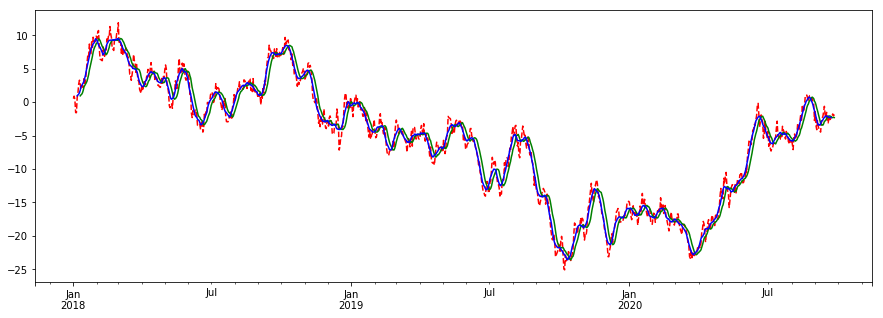

In [36]:
# 画图查看
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 5))

ser_obj.plot(style='r--')
ser_obj.rolling(window=10, center=False).mean().plot(style='g')
ser_obj.rolling(window=10, center=True).mean().plot(style='b')